## Daily stock price prediction    
- 3 stock to predict: Apple Inc.(AAPL), JP Morgan Chase & Co.(JPM), Pfizer Inc.(PFE)
- Predictive Model: Linear Regression, K-NN Regressor, SVM RBF Regressor, Random Forest Regressor 

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
def stock_hist(df,ticker):
    stock = df[df['Ticker']== ticker]
    stock = stock.reset_index()
    stock = stock.drop(columns = "index")
    return stock

In [3]:
def split_data(stock):
    X = np.array(stock[['Open','High','Low']])
    y = np.array(stock['Close'])
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return x_train, x_test, y_train, y_test

In [4]:
def prediction (x_train, x_test, y_train, y_test):
    
    lr_model=LinearRegression()
    lr_model.fit(x_train,y_train)
    y_lr_pred = lr_model.predict(x_test)

    knn_regressor=KNeighborsRegressor(n_neighbors = 5)
    knn_model=knn_regressor.fit(x_train,y_train)
    y_knn_pred=knn_model.predict(x_test)

    svm_rbf_regressor = SVR(kernel='rbf',gamma='scale')
    svm_rbf_model=svm_rbf_regressor.fit(x_train,y_train)
    y_svm_rbf_pred=svm_rbf_model.predict(x_test)

    rf = RandomForestRegressor(n_estimators=100)
    rf_model = rf.fit(x_train, y_train)
    y_rf_pred=rf_model.predict(x_test)

    # prediction table
    op, high, low, close = [],[],[],[]
    for i in range(len(x_test)):
        op.append(x_test[i][0])
        high.append(x_test[i][1])
        low.append(x_test[i][2])

    prediction_table = pd.DataFrame(columns = ['Open','High','Low','Close','y_svm_rbf_pred','y_lr_pred','y_knn_pred','y_rf_pred'])
    prediction_table['Open'] = op
    prediction_table['High'] = high
    prediction_table['Low'] = low
    prediction_table['Close'] = y_test
    prediction_table['y_svm_rbf_pred'] = y_svm_rbf_pred
    prediction_table['y_lr_pred'] = y_lr_pred
    prediction_table['y_knn_pred'] = y_knn_pred
    prediction_table['y_rf_pred'] = y_rf_pred

    # error measure
    lr_rmse = math.sqrt(mean_squared_error(y_test,y_lr_pred))
    knn_rmse = math.sqrt(mean_squared_error(y_test,y_knn_pred))
    svm_rbf_rmse = math.sqrt(mean_squared_error(y_test,y_svm_rbf_pred))
    rf_rmse = math.sqrt(mean_squared_error(y_test,y_rf_pred))

    lr_r2 = r2_score(y_test, y_lr_pred)
    knn_r2 = r2_score(y_test, y_knn_pred)
    svm_rbf_r2 = r2_score(y_test, y_svm_rbf_pred)
    rf_r2 = r2_score(y_test, y_rf_pred)

    lr_accuracy = lr_model.score(x_test, y_test)
    knn_accuracy = knn_model.score(x_test, y_test)
    svm_rbf_accuracy = svm_rbf_model.score(x_test, y_test)
    rf_accuracy = rf_model.score(x_test, y_test)
    
    rmse = [lr_rmse,knn_rmse,svm_rbf_rmse,rf_rmse]
    r2 = [lr_r2,knn_r2,svm_rbf_r2,rf_r2]
    accuracy = [lr_accuracy,knn_accuracy,svm_rbf_accuracy,rf_accuracy]

    cols = ['RMSE','R2','Accuracy']
    inds = ['LinReg','K-NN','SVM_RBF','RanForest']
    error_table = pd.DataFrame(columns = cols, index = inds)
    error_table['RMSE'] = rmse 
    error_table['R2'] = r2
    error_table['Accuracy'] = accuracy

    return prediction_table, error_table

#### load s&p 500 data

In [5]:
df = pd.read_csv("sp500_all_5y.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df

,Ticker,Date,Open,High,Low,Close,Volume
0,MMM,2015-11-16,134.812716,137.108538,134.812716,137.065231,2395000.0
1,MMM,2015-11-17,137.195155,137.342432,135.601074,136.042908,2393000.0
2,MMM,2015-11-18,136.195540,137.346642,136.108344,137.250717,2226900.0
3,MMM,2015-11-19,137.459997,138.227385,136.657720,138.114029,1518200.0
4,MMM,2015-11-20,138.375644,139.387216,138.079153,138.611099,1891100.0
...,...,...,...,...,...,...,...
623239,ZTS,2020-11-09,175.460007,176.410004,165.009995,165.199997,2325300.0
623240,ZTS,2020-11-10,166.039993,166.960007,160.490005,162.559998,2926600.0
623241,ZTS,2020-11-11,164.990005,165.919998,163.330002,164.949997,1570200.0
623242,ZTS,2020-11-12,164.160004,166.600006,163.789993,165.190002,1182800.0


### 1. Apple Inc. stock (Ticker: AAPL)

In [7]:
apple = stock_hist(df,"AAPL")
apple

,Ticker,Date,Open,High,Low,Close,Volume
0,AAPL,2015-11-16,25.588095,26.245143,25.500796,26.231359,152426800.0
1,AAPL,2015-11-17,26.401363,26.431230,26.033784,26.118788,110467600.0
2,AAPL,2015-11-18,26.594344,26.991788,26.534612,26.945841,186698800.0
3,AAPL,2015-11-19,27.026249,27.510994,26.824081,27.288149,173183200.0
4,AAPL,2015-11-20,27.384641,27.550051,27.304233,27.407616,137148400.0
...,...,...,...,...,...,...,...
1254,AAPL,2020-11-09,120.500000,121.989998,116.050003,116.320000,154515300.0
1255,AAPL,2020-11-10,115.550003,117.589996,114.129997,115.970001,138023400.0
1256,AAPL,2020-11-11,117.190002,119.629997,116.440002,119.489998,112295000.0
1257,AAPL,2020-11-12,119.620003,120.529999,118.570000,119.209999,103162300.0


#### stock price visualization

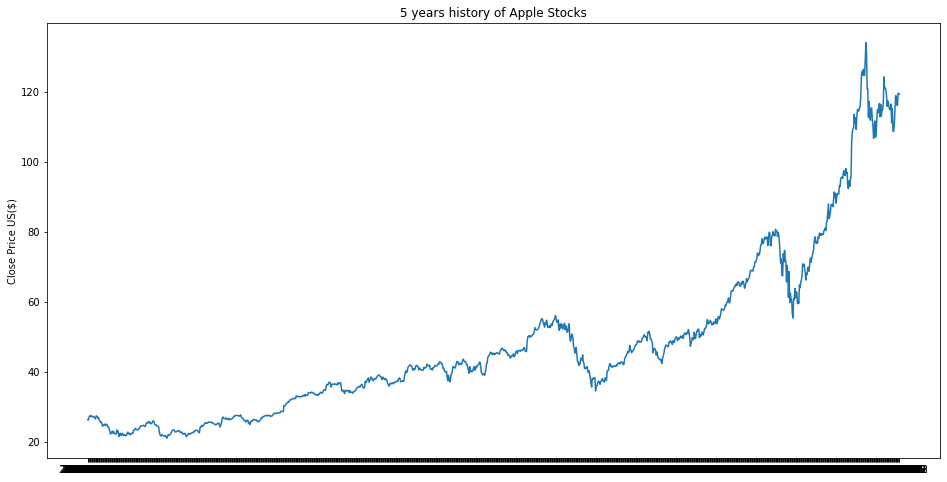

In [8]:
plt.figure(figsize=(16,8))
plt.title('5 years history of Apple Stocks')
plt.plot(apple['Date'],apple['Close'])
plt.ylabel('Close Price US($)')
plt.show()

#### Predict the daily close price

In [9]:
x_train, x_test, y_train, y_test = split_data(apple)

In [10]:
pred_table1, error_table1 = prediction (x_train, x_test, y_train, y_test)

In [11]:
print("Apple Stock Prediction:")
pred_table1

Apple Stock Prediction:


,Open,High,Low,Close,y_svm_rbf_pred,y_lr_pred,y_knn_pred,y_rf_pred
0,45.403299,45.420134,44.787564,45.254173,45.285402,44.949999,45.142087,45.041821
1,44.241615,44.275524,43.040265,43.488350,43.954930,43.388876,43.422657,43.527413
2,31.964637,32.141537,31.752355,31.962276,31.626925,31.927408,32.145782,32.132597
3,78.321815,78.668460,78.009593,78.105476,78.282997,78.359041,78.278584,78.478549
4,23.064693,23.208775,22.997300,23.013567,23.883343,23.101729,23.185534,23.183201
...,...,...,...,...,...,...,...,...
247,24.231286,24.249878,23.878055,23.924532,24.492686,23.962729,24.199205,24.194056
248,119.753392,120.212598,115.460802,115.780251,111.288808,117.077553,119.353421,118.434877
249,54.256502,54.509936,54.070653,54.485802,54.209969,54.303454,54.476493,54.302971
250,88.475063,88.537343,87.463636,87.588196,87.687283,87.784182,88.591652,88.554209


In [12]:
print("Apple Stock Prediction Error Measure:")
error_table1

Apple Stock Prediction Error Measure:


,RMSE,R2,Accuracy
LinReg,0.432816,0.999685,0.999685
K-NN,0.651733,0.999285,0.999285
SVM_RBF,2.448366,0.989910,0.989910
RanForest,0.592638,0.999409,0.999409


### 2. JP Morgan Chase & Co. (Ticker: JPM)

In [13]:
jpm = stock_hist(df,"JPM")
jpm

,Ticker,Date,Open,High,Low,Close,Volume
0,JPM,2015-11-16,56.543356,57.510797,56.292858,57.450333,11041100.0
1,JPM,2015-11-17,57.588538,57.649003,56.914787,57.122093,12354800.0
2,JPM,2015-11-18,57.424418,58.348667,57.329401,58.262283,12911400.0
3,JPM,2015-11-19,58.374583,58.581890,57.908138,58.443687,12839500.0
4,JPM,2015-11-20,58.728727,58.832384,58.201818,58.340027,11209600.0
...,...,...,...,...,...,...,...
1254,JPM,2020-11-09,113.160004,118.900002,110.349998,116.900002,47792400.0
1255,JPM,2020-11-10,117.349998,117.449997,114.690002,116.519997,20539300.0
1256,JPM,2020-11-11,116.889999,116.959999,113.959999,114.779999,14443400.0
1257,JPM,2020-11-12,112.529999,113.959999,112.059998,113.370003,22063000.0


#### stock price visualization

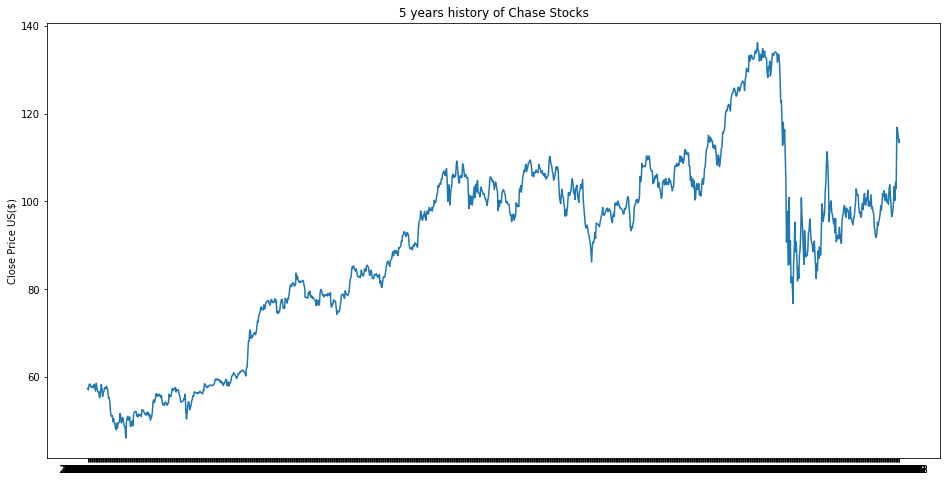

In [14]:
plt.figure(figsize=(16,8))
plt.title('5 years history of Chase Stocks')
plt.plot(jpm['Date'],jpm['Close'])
plt.ylabel('Close Price US($)')
plt.show()

#### Predict the daily close price

In [15]:
x_train, x_test, y_train, y_test = split_data(jpm)
pred_table2, error_table2 = prediction (x_train, x_test, y_train, y_test)

In [16]:
print("Chase Stock Prediction:")
pred_table2

Chase Stock Prediction:


,Open,High,Low,Close,y_svm_rbf_pred,y_lr_pred,y_knn_pred,y_rf_pred
0,51.766066,51.957374,51.461714,51.653023,53.113644,51.675907,51.824896,51.592192
1,101.181108,101.240554,99.100409,99.268852,100.323860,99.594596,99.362192,99.463927
2,92.957416,93.234840,91.154149,91.471207,92.305732,91.766449,92.261728,91.852880
3,95.028207,95.067833,94.156293,94.671516,94.728674,94.334945,94.575165,94.455412
4,74.341686,74.528429,73.301260,74.421722,74.411957,73.669651,74.686862,74.597408
...,...,...,...,...,...,...,...,...
247,109.475939,110.055781,108.915113,109.704079,109.364632,109.437141,109.374719,109.203446
248,127.654241,127.789334,127.036668,127.432304,127.184395,127.186415,127.529976,127.413827
249,51.157356,51.496492,50.470388,51.157356,52.840584,50.903359,51.234975,51.162006
250,86.936021,87.199767,86.317589,86.745033,86.654149,86.625289,86.829045,86.568611


In [17]:
print("Chase Stock Prediction Error Measure:")
error_table2

Chase Stock Prediction Error Measure:


,RMSE,R2,Accuracy
LinReg,0.604663,0.999172,0.999172
K-NN,0.794015,0.998572,0.998572
SVM_RBF,1.315082,0.996084,0.996084
RanForest,0.853867,0.998349,0.998349


### 3. Pfizer Inc. stock (Ticker: PFE)

In [18]:
pfe = stock_hist(df,"PFE")
pfe

,Ticker,Date,Open,High,Low,Close,Volume
0,PFE,2015-11-16,27.603836,27.703339,27.238989,27.496040,25637100.0
1,PFE,2015-11-17,27.529212,27.744801,27.255577,27.255577,29692200.0
2,PFE,2015-11-18,27.429705,27.719921,27.305324,27.620419,35963300.0
3,PFE,2015-11-19,27.189238,27.338492,26.492715,26.774641,90712700.0
4,PFE,2015-11-20,27.015110,27.023401,26.600514,26.683432,64599600.0
...,...,...,...,...,...,...,...
1254,PFE,2020-11-09,41.860001,41.990002,38.380001,39.200001,218362300.0
1255,PFE,2020-11-10,40.450001,40.540001,38.459999,38.680000,75988300.0
1256,PFE,2020-11-11,38.880001,40.200001,37.900002,38.500000,55959200.0
1257,PFE,2020-11-12,38.279999,38.340000,37.240002,37.549999,44371800.0


#### stock price visualization

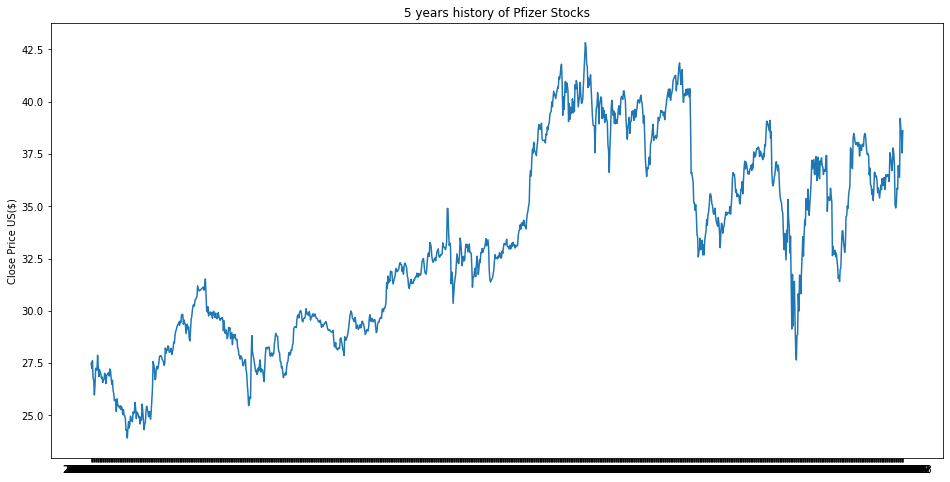

In [19]:
plt.figure(figsize=(16,8))
plt.title('5 years history of Pfizer Stocks')
plt.plot(pfe['Date'],pfe['Close'])
plt.ylabel('Close Price US($)')
plt.show()

#### Predict the daily close price

In [20]:
x_train, x_test, y_train, y_test = split_data(pfe)
pred_table3, error_table3 = prediction (x_train, x_test, y_train, y_test)

In [21]:
print("Pfizer Stock Prediction:")
pred_table3

Pfizer Stock Prediction:


,Open,High,Low,Close,y_svm_rbf_pred,y_lr_pred,y_knn_pred,y_rf_pred
0,32.440103,32.538489,32.243333,32.323830,32.379224,32.376077,32.486081,32.454008
1,27.759919,27.955891,27.580985,27.674711,27.749170,27.778632,27.748508,27.809444
2,32.234994,32.332489,32.084324,32.305901,32.198581,32.205975,32.299213,32.225818
3,31.669616,32.892529,31.669616,32.649887,32.385094,32.578147,32.178543,32.207098
4,37.872895,37.968973,37.594279,37.776821,37.764180,37.746353,37.733537,37.756835
...,...,...,...,...,...,...,...,...
247,32.833643,33.021467,32.735258,32.905197,32.882461,32.911363,32.866583,32.897580
248,27.345334,27.454211,27.052197,27.219704,27.195841,27.211732,27.234610,27.220431
249,29.035259,29.226507,28.991790,29.078724,29.137321,29.156219,29.095687,29.082508
250,30.052355,30.104515,29.774173,29.930651,29.939932,29.890299,29.895986,29.927843


In [22]:
print("Pfizer Stock Prediction Error Measure:")
error_table3

Pfizer Stock Prediction Error Measure:


,RMSE,R2,Accuracy
LinReg,0.165957,0.998727,0.998727
K-NN,0.201243,0.998128,0.998128
SVM_RBF,0.210889,0.997944,0.997944
RanForest,0.207013,0.998019,0.998019


#### reference
1. https://towardsai.net/p/machine-learning/netflix-stock-prediction-model-a-comparative-study-of-linear-regression-k-nearest-neighbor-knn-4527ff17939b
2. https://towardsdatascience.com/an-introduction-to-random-forest-using-tesla-stock-prices-d9c6e113be3c
3. https://randerson112358.medium.com/predict-stock-prices-using-python-machine-learning-53aa024da20a